In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(1021)

In [3]:
df=pd.read_csv("basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [4]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

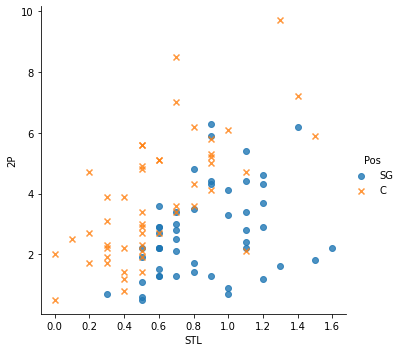

In [6]:
sns.lmplot('STL','2P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

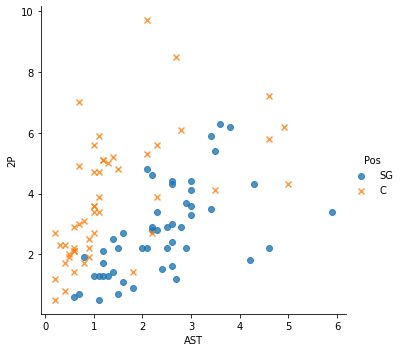

In [7]:
sns.lmplot('AST','2P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

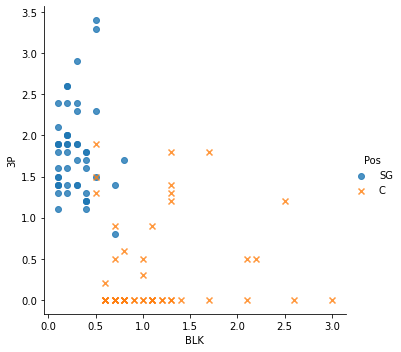

In [8]:
sns.lmplot('BLK','3P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

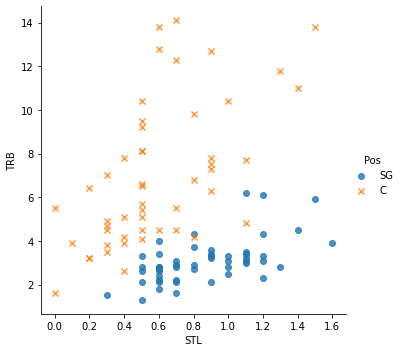

In [9]:
sns.lmplot('STL','TRB', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

In [10]:
df.drop(['2P','AST','STL'],axis=1, inplace=True)
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test=train_test_split(df, train_size=0.8)

In [13]:
train.to_csv("basketball_train.csv", index=None)
test.to_csv("basketball_test.csv", index=None)

In [14]:
maxKRange=train.shape[0]//2
kList=[]
for i in range(3, maxKRange, 2):
    kList.append(i)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [16]:
xTrain=train[['3P','TRB','BLK']]
yTrain=train[['Pos']]

In [17]:
yTrain.values.ravel()

array(['SG', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'C',
       'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG',
       'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG',
       'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [18]:
cross_val_scores=[]
for k in kList:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, xTrain, yTrain.values.ravel(), cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())
max(cross_val_scores)

0.9375

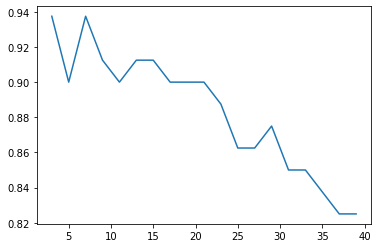

In [19]:
plt.plot(kList, cross_val_scores)

In [20]:
k=kList[cross_val_scores.index(max(cross_val_scores))]
print("최적의 k="+str(k))

최적의 k=3


In [21]:
knn=KNeighborsClassifier(n_neighbors=k)
xTrain=train[['3P','BLK']]
yTrain=train['Pos']
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [22]:
xTest=test[['3P','BLK']]

In [23]:
yPred=knn.predict(xTest)
yPred

array(['C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'C'], dtype=object)

In [24]:
yTest=test['Pos']
yTest

90     C
45    SG
85     C
89    SG
67    SG
3      C
55    SG
54     C
50     C
79    SG
28    SG
80    SG
37     C
66     C
49    SG
91     C
57     C
77     C
1      C
40     C
Name: Pos, dtype: object

In [25]:
pd.DataFrame({'예측':yPred, '정답':yTest})

,예측,정답
90,C,C
45,SG,SG
85,SG,C
89,SG,SG
67,SG,SG
3,C,C
55,SG,SG
54,SG,C
50,C,C
79,SG,SG


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("정확도: "+str(accuracy_score(yTest, yPred)))

정확도: 0.85


In [28]:
xTrain2=train[['3P','TRB','BLK']]
xTest2=test[['3P','TRB','BLK']]

In [29]:
cross_val_scores2=[]
for k in kList:
    knn2=KNeighborsClassifier(n_neighbors=k)
    scores2=cross_val_score(knn2, xTrain2, yTrain.values.ravel(), cv=10, scoring='accuracy')
    cross_val_scores2.append(scores2.mean())
max(cross_val_scores2)

0.9375

In [30]:
k=kList[cross_val_scores2.index(max(cross_val_scores2))]
print("최적의 k="+str(k))

최적의 k=3


In [31]:
knn2=KNeighborsClassifier(n_neighbors=k)
knn2.fit(xTrain2, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [32]:
yPred2=knn2.predict(xTest2)
yPred2

array(['C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'C'], dtype=object)

In [33]:
print("정확도: "+str(accuracy_score(yTest, yPred2)))

정확도: 0.85
